## Python Confidence Intervals

In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(20)

In [3]:
# Example 1: Marathon Long Run

In [4]:
data = np.random.normal(loc=20, scale=4, size=25)

In [5]:
mean = np.mean(data)

In [6]:
print(mean)

19.74934586286378


In [7]:
std_dev = np.std(data, ddof=1)
std_dev

4.508754530882857

In [8]:
n = len(data)

In [9]:
print(n)

25


In [10]:
se = std_dev / np.sqrt(n)
print(se)

0.9017509061765715


In [11]:
# 90, 95, 99%

In [12]:
confidence_intervals = [0.9, 0.95, 0.99]

In [14]:
for conf in confidence_intervals:
    z = stats.norm.ppf(1 - (1 - conf)/2)
    margin_of_error = z * se
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    print(f'{int(conf * 100)}% CI: ({ci_lower:.2f}, {ci_upper:.2f})')

90% CI: (18.27, 21.23)
95% CI: (17.98, 21.52)
99% CI: (17.43, 22.07)


In [15]:
#Example 2 Confidence interval width

In [27]:
confidence_levels = np.linspace(0.8, 0.99, 20)

In [28]:
ci_widths = []

In [29]:
for conf in confidence_levels:
    z = stats.norm.ppf(1 - (1 - conf)/2)
    margin_of_error = z * se
    ci_width = 2 * margin_of_error
    ci_widths.append(ci_width)
# ci_widths

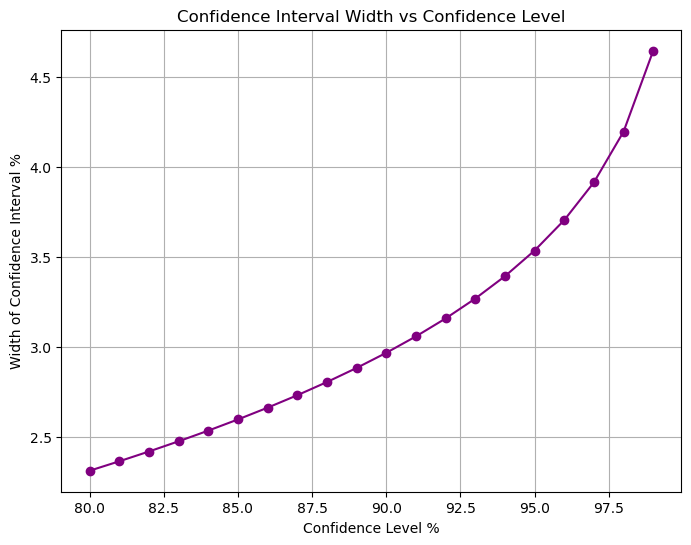

In [30]:
plt.figure(figsize=(8,6))
plt.plot(confidence_levels * 100, ci_widths, marker='o', color='purple')
plt.title('Confidence Interval Width vs Confidence Level')
plt.xlabel('Confidence Level %')
plt.ylabel('Width of Confidence Interval %')
plt.grid(True)
plt.show()

In [31]:
# Example 3 Forest Plot

In [32]:
data_marathon_group_1 = np.random.normal(loc=175, scale=15, size=25)
data_marathon_group_2 = np.random.normal(loc=205, scale=20, size=25)
data_marathon_group_3 = np.random.normal(loc=180, scale=10, size=25)

In [33]:
groups = ['Group 1', 'Group 2', 'Group 3']

In [34]:
data_sets = [data_marathon_group_1, data_marathon_group_2, data_marathon_group_3]

In [35]:
means = [np.mean(data) for data in data_sets]

In [36]:
ses = [np.std(data, ddof=1) / np.sqrt(len(data)) for data in data_sets]

In [37]:
conf_levels = [0.9, 0.95, 0.99]

In [38]:
colors = ['blue', 'green', 'orange']

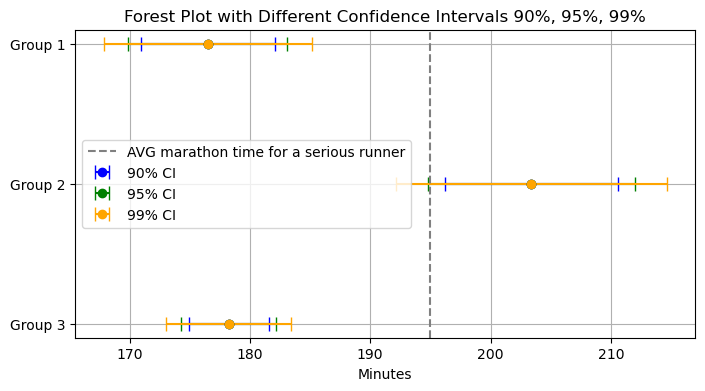

In [41]:
plt.figure(figsize=(8,4))

for i, conf in enumerate(conf_levels):
    z = stats.norm.ppf(1 - (1 - conf) / 2)
    ci_intervals = [(m - z * se, m + z * se) for m, se in zip(means, ses)]
    lower_errors = [m - ci[0] for m, ci in zip(means, ci_intervals)]
    upper_errors = [ci[1] - m for m, ci in zip(means, ci_intervals)]
    
    plt.errorbar(x=means, y=groups, xerr=[lower_errors, upper_errors], fmt='o', capsize=5, color=colors[i], label=f'{int(conf*100)}% CI')

plt.axvline(x=195, linestyle='--', color='gray', label='AVG marathon time for a serious runner')
plt.xlabel('Minutes')
plt.title('Forest Plot with Different Confidence Intervals 90%, 95%, 99%')
plt.legend()
plt.gca()
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [42]:
#Example 4: Bar Chart

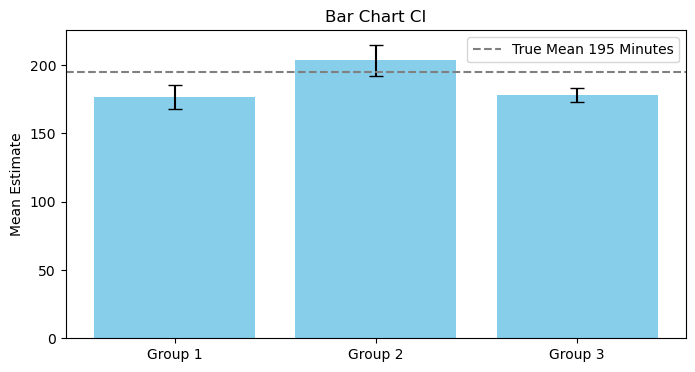

In [44]:
plt.figure(figsize=(8, 4))

symmetric_errors = [(low + up) / 2 for low, up in zip(lower_errors, upper_errors)]
plt.bar(groups, means, yerr=symmetric_errors, capsize=5, color='skyblue')
plt.axhline(y=195, linestyle='--', color='gray', label='True Mean 195 Minutes')
plt.ylabel('Mean Estimate')
plt.title('Bar Chart CI')
plt.legend()
plt.show()